# Comedy Bang Bang Podcast Best Of - K - Nearest Neighbors Model

In [38]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [39]:
filename = os.path.join(os.getcwd(), "data", "Comedy_bang_bang_podcast_dataset - full_dataset-v16_train.csv")
df = pd.read_csv(filename, header=0)

df.head()

,duration_in_minutes_winsorized_normalized,hundo,month_published_int_winsorized_normalized,num_actors,num_chars,label
0,0.000000,False,0.000000,3,2,True
1,0.024390,False,0.000000,3,1,False
2,0.012195,False,0.000000,3,0,False
3,0.000000,False,0.000000,5,0,False
4,0.060976,False,0.090909,3,1,False


In [40]:
df.dtypes

duration_in_minutes_winsorized_normalized    float64
hundo                                           bool
month_published_int_winsorized_normalized    float64
num_actors                                     int64
num_chars                                      int64
label                                           bool
dtype: object

In [41]:
y = df['label'] 
X = df.drop(columns = 'label', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

def train_test_knn(X_train, X_test, y_train, y_test, k):
    '''
    Fit a k Nearest Neighbors classifier to the training data X_train, y_train.
    Return the accuracy of resulting predictions on the test data.
    '''
    
    # 1. Create the  KNeighborsClassifier model object below and assign to variable 'model'
    # YOUR CODE HERE
    # raise NotImplementedError()
    model = KNeighborsClassifier(n_neighbors=k)


    # 2. Fit the model to the training data below
    # YOUR CODE HERE
    # raise NotImplementedError()
    model.fit(X_train, y_train)
    
    # 3. Make predictions on the test data below and assign the result to the variable 'class_label_predictions'
    # YOUR CODE HERE
    # raise NotImplementedError()
    class_label_predictions = model.predict(X_test) 

    # 4. Compute the accuracy here and save the result to the variable 'acc_score'
    # YOUR CODE HERE
    # raise NotImplementedError()
    acc_score = accuracy_score(y_test, class_label_predictions)
    
    
    return acc_score


In [42]:
k_values = [5, 10, 50, 100]

acc1 = [] 

for k in k_values:
    score = train_test_knn(X_train, X_test, y_train, y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc1.append(float(score))
    

k=5, accuracy score: 0.7661290322580645
k=10, accuracy score: 0.7903225806451613
k=50, accuracy score: 0.7782258064516129
k=100, accuracy score: 0.7782258064516129


In [43]:
acc2 = [] 

for k in k_values:
    score = train_test_knn(X_train[:1500], X_test, y_train[:1500], y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc2.append(float(score))

    

k=5, accuracy score: 0.7661290322580645
k=10, accuracy score: 0.7903225806451613
k=50, accuracy score: 0.7782258064516129
k=100, accuracy score: 0.7782258064516129


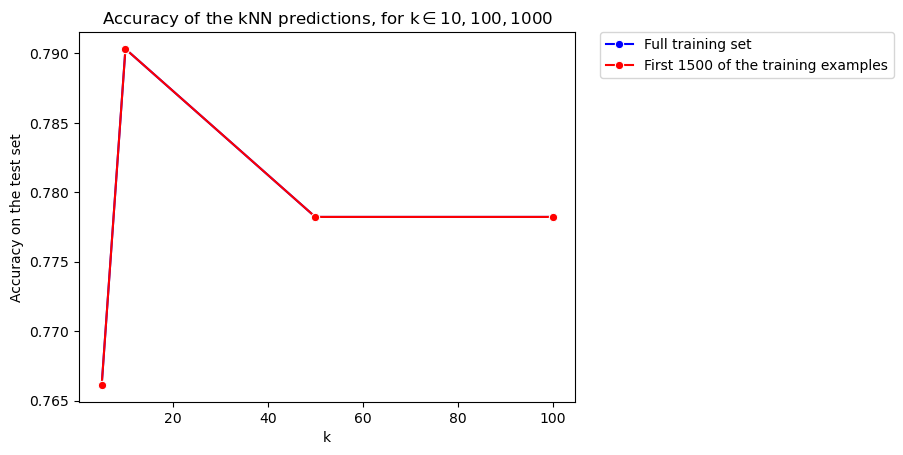

In [44]:
# Visualizing accuracy:
fig = plt.figure()
ax = fig.add_subplot(111)
p1 = sns.lineplot(x=k_values, y=acc1, color='b', marker='o', label = 'Full training set')
p2 = sns.lineplot(x=k_values, y=acc2, color='r', marker='o', label = 'First 1500 of the training examples')

plt.title('Accuracy of the kNN predictions, for k$\in{10,100,1000}$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('k')
ax.set_ylabel('Accuracy on the test set')
plt.show()

In [45]:
acc1_40 = [] 
print("Accuracy scores for full training data:")
for k in range(1,41):
    score = train_test_knn(X_train, X_test, y_train, y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc1_40.append(float(score))
    


Accuracy scores for full training data:
k=1, accuracy score: 0.6532258064516129
k=2, accuracy score: 0.7701612903225806
k=3, accuracy score: 0.7258064516129032
k=4, accuracy score: 0.782258064516129
k=5, accuracy score: 0.7661290322580645
k=6, accuracy score: 0.7943548387096774
k=7, accuracy score: 0.7862903225806451
k=8, accuracy score: 0.7943548387096774
k=9, accuracy score: 0.7782258064516129
k=10, accuracy score: 0.7903225806451613
k=11, accuracy score: 0.7903225806451613
k=12, accuracy score: 0.7903225806451613
k=13, accuracy score: 0.782258064516129
k=14, accuracy score: 0.7943548387096774
k=15, accuracy score: 0.7943548387096774
k=16, accuracy score: 0.7943548387096774
k=17, accuracy score: 0.7943548387096774
k=18, accuracy score: 0.7943548387096774
k=19, accuracy score: 0.7943548387096774
k=20, accuracy score: 0.7983870967741935
k=21, accuracy score: 0.7983870967741935
k=22, accuracy score: 0.7983870967741935
k=23, accuracy score: 0.7983870967741935
k=24, accuracy score: 0.7943

In [46]:
# acc2_40 = []
# print("\nAccuracy scores for 50 examples in training data:")
# for k in range(1,41):
#     score = train_test_knn(X_train, X_test, y_train, y_test, k)
#     print('k=' + str(k) + ', accuracy score: ' + str(score))
#     acc2_40.append(float(score))
    



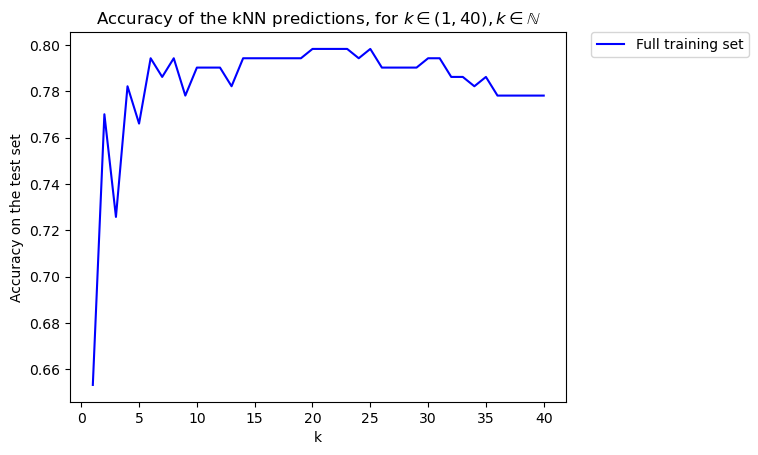

In [47]:
x = [i for i in range(1,41)]

fig = plt.figure()
ax = fig.add_subplot(111)
p1 = plt.plot(x, acc1_40, 'b-', label = 'Full training set')
# p2 = plt.plot(x, acc2_40, 'r-', label = 'First 50 of the training examples') 

plt.title('Accuracy of the kNN predictions, for $k\in(1, 40), k\in\mathbb{N}$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('k')
ax.set_ylabel('Accuracy on the test set')
plt.show()